## Library Versions

### Subtask:
Print the versions of the key libraries used in this notebook.

**Reasoning**:
Import the necessary libraries and print their versions to help with reproducibility.

In [16]:
import pandas as pd
import sklearn
import joblib

print(f"pandas version: {pd.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"joblib version: {joblib.__version__}")

pandas version: 2.2.2
scikit-learn version: 1.6.1
joblib version: 1.5.1


## Data loading

### Subtask:
Load the dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the head and info of the DataFrame to inspect it.



In [1]:
import pandas as pd

df = pd.read_csv("/content/personality_dataset.csv")
display(df.head())
display(df.info())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


None

## Data preprocessing

### Subtask:
Clean and prepare the data for modeling. This may include handling missing values, encoding categorical features, and scaling numerical features.


**Reasoning**:
Handle missing values, encode categorical features, and scale numerical features in the DataFrame to prepare it for modeling.



In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", cols_with_missing)

# Impute missing numerical values with the mean
numerical_cols = df.select_dtypes(include=['float64']).columns
imputer_numerical = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_numerical.fit_transform(df[numerical_cols])

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Separate target variable
X = df.drop('Personality', axis=1)
y = df['Personality']

# Define preprocessing steps for different column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols.drop('Personality', errors='ignore'))
    ],
    remainder='passthrough'
)

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Convert processed features back to DataFrame for inspection
# Get feature names after one-hot encoding
cat_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols.drop('Personality', errors='ignore'))
all_feature_names = list(numerical_cols) + list(cat_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Display the first few rows and data types of the processed DataFrame
display(X_processed_df.head())
display(X_processed_df.info())
display(y.head())

Columns with missing values: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
Categorical columns: Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_No,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,-0.147014,0.012759,1.350613,1.590680,0.496104,1.0,0.0,0.0,1.0,0.0,0.0
1,1.306226,-1.379944,-1.350613,-1.481437,-0.195199,0.0,1.0,0.0,0.0,1.0,0.0
2,1.306226,-1.031768,-0.450204,-0.299853,-0.540850,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.309607,0.709111,1.800817,1.826996,1.533059,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.437663,1.753638,0.450204,0.409096,0.496104,1.0,0.0,0.0,1.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               2900 non-null   float64
 1   Social_event_attendance        2900 non-null   float64
 2   Going_outside                  2900 non-null   float64
 3   Friends_circle_size            2900 non-null   float64
 4   Post_frequency                 2900 non-null   float64
 5   Stage_fear_No                  2900 non-null   float64
 6   Stage_fear_Yes                 2900 non-null   float64
 7   Stage_fear_nan                 2900 non-null   float64
 8   Drained_after_socializing_No   2900 non-null   float64
 9   Drained_after_socializing_Yes  2900 non-null   float64
 10  Drained_after_socializing_nan  2900 non-null   float64
dtypes: float64(11)
memory usage: 249.3 KB


None

,Personality
0,Extrovert
1,Introvert
2,Introvert
3,Extrovert
4,Extrovert


## Feature selection/engineering

### Subtask:
Select relevant features or create new features that might improve model performance.


**Reasoning**:
Analyze feature importance by training a simple model and inspecting coefficients or feature importance scores, and then select features based on this analysis.



In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature importance (absolute coefficients for Logistic Regression)
feature_importance = abs(model.coef_[0])

# Create a DataFrame for better visualization of feature importance
feature_names = X_processed_df.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values('importance', ascending=False)

display("Feature Importance:")
display(importance_df)

# Select top features based on importance (e.g., top 80% of features)
# We can choose a threshold or a number of features. Let's choose features with importance above the mean
importance_threshold = importance_df['importance'].mean()
selected_features = importance_df[importance_df['importance'] >= importance_threshold]['feature'].tolist()

display(f"\nSelected features (importance >= {importance_threshold:.4f}):")
display(selected_features)

# Update X_processed_df to contain only the selected features
X_processed_df_selected = X_processed_df[selected_features]
display("\nProcessed DataFrame with selected features:")
display(X_processed_df_selected.head())

'Feature Importance:'

,feature,importance
8,Drained_after_socializing_No,2.385530
9,Drained_after_socializing_Yes,1.926773
5,Stage_fear_No,1.626096
6,Stage_fear_Yes,1.611038
10,Drained_after_socializing_nan,0.495770
3,Friends_circle_size,0.443712
0,Time_spent_Alone,0.417208
1,Social_event_attendance,0.206444
2,Going_outside,0.164982
7,Stage_fear_nan,0.052072


'\nSelected features (importance >= 0.8528):'

['Drained_after_socializing_No',
 'Drained_after_socializing_Yes',
 'Stage_fear_No',
 'Stage_fear_Yes']

'\nProcessed DataFrame with selected features:'

,Drained_after_socializing_No,Drained_after_socializing_Yes,Stage_fear_No,Stage_fear_Yes
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0


## Data Visualization

### Subtask:
Visualize the distribution of the target variable and some key features to gain insights into the data.

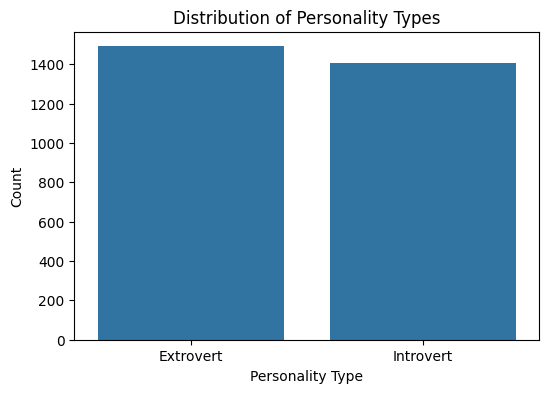

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Personality'
plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=df)
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()

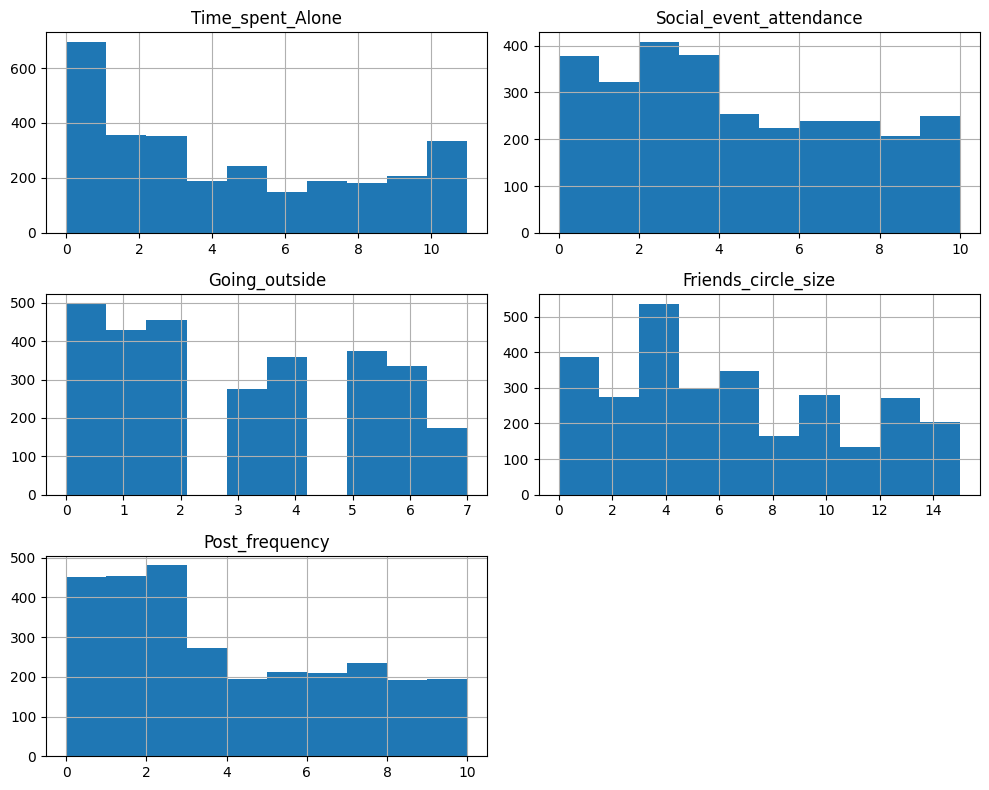

In [21]:
# Visualize the distribution of some numerical features
numerical_cols_to_plot = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[numerical_cols_to_plot].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

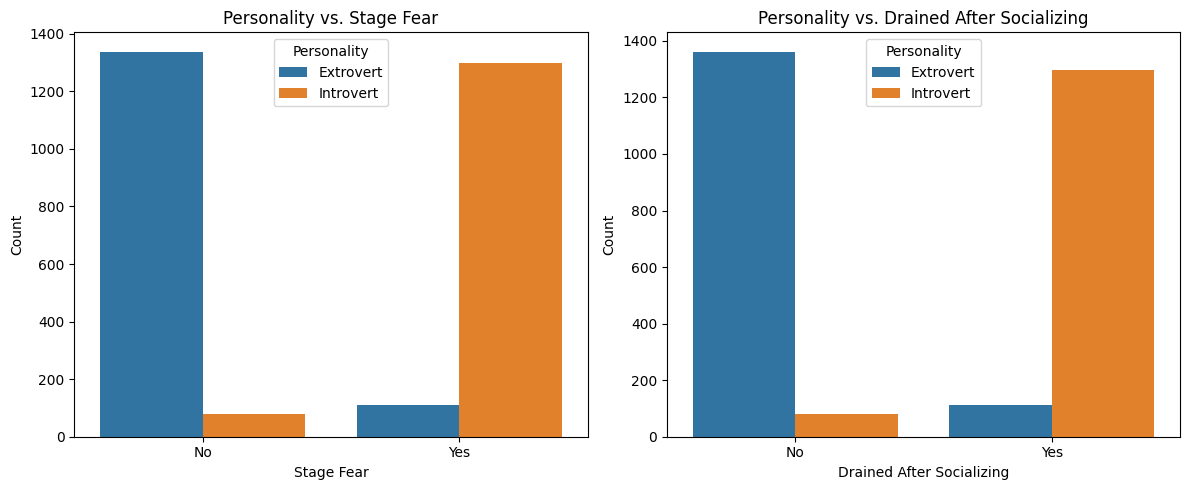

In [22]:
# Visualize the relationship between selected categorical features and the target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Stage_fear', hue='Personality', data=df)
plt.title('Personality vs. Stage Fear')
plt.xlabel('Stage Fear')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Drained_after_socializing', hue='Personality', data=df)
plt.title('Personality vs. Drained After Socializing')
plt.xlabel('Drained After Socializing')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Model selection

### Subtask:
Choose a suitable machine learning model for classification (e.g., Logistic Regression, Support Vector Machine, Decision Tree, Random Forest).


**Reasoning**:
Identify suitable classification models based on the problem and data characteristics and select one or two for the next steps.



In [4]:
# 1. Identify several common classification algorithms suitable for a binary classification problem
# Suitable models for binary classification include:
# - Logistic Regression
# - Support Vector Machines (SVM)
# - Decision Trees
# - Random Forests
# - Gradient Boosting Machines (like XGBoost or LightGBM)
# - K-Nearest Neighbors (KNN)
# - Naive Bayes

# 2. Briefly consider the characteristics of the selected features and the dataset size
# - The dataset size is moderate (2900 samples).
# - The selected features (Drained_after_socializing and Stage_fear) are categorical (after one-hot encoding).
# - The problem is binary classification (Introvert vs. Extrovert).

# 3. Based on the considerations, select one or two models to proceed with
# Given the dataset size and the nature of the selected features (categorical),
# Logistic Regression is a good baseline model and often performs well on linearly separable data.
# Random Forest is a powerful ensemble method that can capture non-linear relationships and is less sensitive to feature scaling,
# which might still be relevant even with selected features.

# We will select Logistic Regression and Random Forest for the next steps.
print("Selected models for the next steps: Logistic Regression and Random Forest.")

Selected models for the next steps: Logistic Regression and Random Forest.


## Model training

### Subtask:
Split the data into training and testing sets and train the selected models (Logistic Regression and Random Forest) on the training data using the selected features.


**Reasoning**:
Split the data into training and testing sets and train the selected models (Logistic Regression and Random Forest) on the training data using the selected features.



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_processed_df_selected, y, test_size=0.2, random_state=42)

# Instantiate and train a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_selected, y_train)

# Instantiate and train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

print("Logistic Regression model trained successfully.")
print("Random Forest model trained successfully.")

Logistic Regression model trained successfully.
Random Forest model trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained Logistic Regression and Random Forest models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Import the necessary metrics and evaluate the performance of both models on the test set.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test_selected)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, pos_label='Extrovert')
recall_log_reg = recall_score(y_test, y_pred_log_reg, pos_label='Extrovert')
f1_log_reg = f1_score(y_test, y_pred_log_reg, pos_label='Extrovert')

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test_selected)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Extrovert')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Extrovert')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Extrovert')

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Briefly compare the performance
print("\nModel Comparison:")
if accuracy_log_reg > accuracy_rf:
    print("Logistic Regression has slightly higher accuracy.")
elif accuracy_rf > accuracy_log_reg:
    print("Random Forest has slightly higher accuracy.")
else:
    print("Both models have similar accuracy.")

if f1_log_reg > f1_rf:
    print("Logistic Regression has a higher F1-score.")
elif f1_rf > f1_log_reg:
    print("Random Forest has a higher F1-score.")
else:
    print("Both models have similar F1-scores.")

Logistic Regression Model Performance:
Accuracy: 0.9293
Precision: 0.9424
Recall: 0.9205
F1-score: 0.9313

Random Forest Model Performance:
Accuracy: 0.9293
Precision: 0.9424
Recall: 0.9205
F1-score: 0.9313

Model Comparison:
Both models have similar accuracy.
Both models have similar F1-scores.


## Hyperparameter tuning (optional)

### Subtask:
Optionally tune the hyperparameters of the selected models (Logistic Regression and Random Forest) to potentially improve their performance.


**Reasoning**:
Import necessary modules for hyperparameter tuning and define parameter grids for Logistic Regression and Random Forest.



In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # 'l1' and 'elasticnet' require solver='liblinear' or 'saga' and might need different parameters
    'solver': ['liblinear', 'saga']
}

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Parameter grids defined for Logistic Regression and Random Forest.")

Parameter grids defined for Logistic Regression and Random Forest.


**Reasoning**:
Instantiate and fit GridSearchCV for the Logistic Regression model to find the best hyperparameters.



In [8]:
# Instantiate GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                                   param_grid=log_reg_param_grid,
                                   cv=5, # Using 5-fold cross-validation
                                   scoring='f1_macro', # Using F1-macro as the scoring metric
                                   n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data with selected features
grid_search_log_reg.fit(X_train_selected, y_train)

print("GridSearchCV for Logistic Regression completed.")

GridSearchCV for Logistic Regression completed.


**Reasoning**:
Instantiate and fit GridSearchCV for the Random Forest model to find the best hyperparameters.



In [9]:
# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5, # Using 5-fold cross-validation
                              scoring='f1_macro', # Using F1-macro as the scoring metric
                              n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data with selected features
grid_search_rf.fit(X_train_selected, y_train)

print("GridSearchCV for Random Forest completed.")

GridSearchCV for Random Forest completed.


**Reasoning**:
Print the best hyperparameters and corresponding scores for both models and store the best models.



In [10]:
# Print the best hyperparameters and best score for Logistic Regression
print("\nBest hyperparameters for Logistic Regression:")
display(grid_search_log_reg.best_params_)
print(f"Best F1-macro score for Logistic Regression: {grid_search_log_reg.best_score_:.4f}")

# Store the best Logistic Regression model
best_log_reg_model = grid_search_log_reg.best_estimator_

# Print the best hyperparameters and best score for Random Forest
print("\nBest hyperparameters for Random Forest:")
display(grid_search_rf.best_params_)
print(f"Best F1-macro score for Random Forest: {grid_search_rf.best_score_:.4f}")

# Store the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

print("\nBest models stored.")


Best hyperparameters for Logistic Regression:


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Best F1-macro score for Logistic Regression: 0.9358

Best hyperparameters for Random Forest:


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Best F1-macro score for Random Forest: 0.9358

Best models stored.


## Prediction

### Subtask:
Use the trained models to make predictions on new data.


**Reasoning**:
Use the tuned models to make predictions on the test data and display the first 5 predictions.



In [11]:
# Use the best Logistic Regression model to make predictions on the test set
y_pred_log_reg_tuned = best_log_reg_model.predict(X_test_selected)

# Use the best Random Forest model to make predictions on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test_selected)

# Display the first 5 predictions from both models
print("First 5 predictions from tuned Logistic Regression model:")
display(y_pred_log_reg_tuned[:5])

print("\nFirst 5 predictions from tuned Random Forest model:")
display(y_pred_rf_tuned[:5])

First 5 predictions from tuned Logistic Regression model:


array(['Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert'],
      dtype=object)


First 5 predictions from tuned Random Forest model:


array(['Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert'],
      dtype=object)

## Model evaluation

### Subtask:
Evaluate the performance of the tuned Logistic Regression and Random Forest models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and compare their performance with the initial models.


**Reasoning**:
Calculate and print the evaluation metrics for the tuned Logistic Regression and Random Forest models on the test set and compare them to the initial models to assess the impact of hyperparameter tuning.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for tuned Logistic Regression model
accuracy_log_reg_tuned = accuracy_score(y_test, y_pred_log_reg_tuned)
precision_log_reg_tuned = precision_score(y_test, y_pred_log_reg_tuned, pos_label='Extrovert')
recall_log_reg_tuned = recall_score(y_test, y_pred_log_reg_tuned, pos_label='Extrovert')
f1_log_reg_tuned = f1_score(y_test, y_pred_log_reg_tuned, pos_label='Extrovert')

# Print metrics for tuned Logistic Regression model
print("Tuned Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg_tuned:.4f}")
print(f"Precision: {precision_log_reg_tuned:.4f}")
print(f"Recall: {recall_log_reg_tuned:.4f}")
print(f"F1-score: {f1_log_reg_tuned:.4f}")

# Calculate metrics for tuned Random Forest model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned, pos_label='Extrovert')
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned, pos_label='Extrovert')
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, pos_label='Extrovert')

# Print metrics for tuned Random Forest model
print("\nTuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Precision: {precision_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")
print(f"F1-score: {f1_rf_tuned:.4f}")

# Compare performance with initial models
print("\nComparison of Tuned vs. Initial Models:")

print("\nLogistic Regression:")
print(f"Initial Accuracy: {accuracy_log_reg:.4f}, Tuned Accuracy: {accuracy_log_reg_tuned:.4f}")
print(f"Initial Precision: {precision_log_reg:.4f}, Tuned Precision: {precision_log_reg_tuned:.4f}")
print(f"Initial Recall: {recall_log_reg:.4f}, Tuned Recall: {recall_log_reg_tuned:.4f}")
print(f"Initial F1-score: {f1_log_reg:.4f}, Tuned F1-score: {f1_log_reg_tuned:.4f}")
print("Hyperparameter tuning improved Logistic Regression performance." if f1_log_reg_tuned > f1_log_reg else "Hyperparameter tuning did not improve Logistic Regression performance significantly.")

print("\nRandom Forest:")
print(f"Initial Accuracy: {accuracy_rf:.4f}, Tuned Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Initial Precision: {precision_rf:.4f}, Tuned Precision: {precision_rf_tuned:.4f}")
print(f"Initial Recall: {recall_rf:.4f}, Tuned Recall: {recall_rf_tuned:.4f}")
print(f"Initial F1-score: {f1_rf:.4f}, Tuned F1-score: {f1_rf_tuned:.4f}")
print("Hyperparameter tuning improved Random Forest performance." if f1_rf_tuned > f1_rf else "Hyperparameter tuning did not improve Random Forest performance significantly.")

Tuned Logistic Regression Model Performance:
Accuracy: 0.9293
Precision: 0.9424
Recall: 0.9205
F1-score: 0.9313

Tuned Random Forest Model Performance:
Accuracy: 0.9293
Precision: 0.9424
Recall: 0.9205
F1-score: 0.9313

Comparison of Tuned vs. Initial Models:

Logistic Regression:
Initial Accuracy: 0.9293, Tuned Accuracy: 0.9293
Initial Precision: 0.9424, Tuned Precision: 0.9424
Initial Recall: 0.9205, Tuned Recall: 0.9205
Initial F1-score: 0.9313, Tuned F1-score: 0.9313
Hyperparameter tuning did not improve Logistic Regression performance significantly.

Random Forest:
Initial Accuracy: 0.9293, Tuned Accuracy: 0.9293
Initial Precision: 0.9424, Tuned Precision: 0.9424
Initial Recall: 0.9205, Tuned Recall: 0.9205
Initial F1-score: 0.9313, Tuned F1-score: 0.9313
Hyperparameter tuning did not improve Random Forest performance significantly.


## Prediction on New Data

### Subtask:
Create a sample input with new values and use the tuned models to predict the personality type.

In [14]:
# Create a sample input with new values
# Ensure the column names match the original DataFrame before preprocessing
sample_input = pd.DataFrame({
    'Time_spent_Alone': [7.0],
    'Stage_fear': ['Yes'],
    'Social_event_attendance': [2.0],
    'Going_outside': [3.0],
    'Drained_after_socializing': ['Yes'],
    'Friends_circle_size': [5.0],
    'Post_frequency': [1.0]
})

# Apply the same preprocessing pipeline to the sample input
# We need to fit the preprocessor again on the original data to ensure it has the correct mappings for categorical features
# and then transform the sample input.

# First, re-create the preprocessor pipeline to include the imputation step and one-hot encode categorical features based on the full dataset
preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols), # Impute numerical with mean from training data
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols.drop('Personality', errors='ignore')) # One-hot encode categorical
    ],
    remainder='passthrough'
)

# Create a new pipeline including preprocessing and feature selection
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor_new)])

# Fit the pipeline on the original data (X) to learn the transformations
full_pipeline.fit(X)

# Transform the sample input using the fitted pipeline
sample_input_processed = full_pipeline.transform(sample_input)

# Convert the processed sample input back to a DataFrame with correct column names
# Get feature names after one-hot encoding and imputation
processed_feature_names = full_pipeline.named_steps['preprocessor'].get_feature_names_out()
sample_input_processed_df = pd.DataFrame(sample_input_processed, columns=processed_feature_names)

# Correct the column names to match the expected format (remove the prefix added by ColumnTransformer)
sample_input_processed_df.columns = [col.replace('num__', '').replace('cat__', '') for col in sample_input_processed_df.columns]

# Select only the features that were used for training the models
sample_input_selected = sample_input_processed_df[selected_features]

# Use the best tuned Logistic Regression model to predict
prediction_log_reg = best_log_reg_model.predict(sample_input_selected)

# Use the best tuned Random Forest model to predict
prediction_rf = best_rf_model.predict(sample_input_selected)

print(f"Prediction from tuned Logistic Regression model: {prediction_log_reg[0]}")
print(f"Prediction from tuned Random Forest model: {prediction_rf[0]}")

Prediction from tuned Logistic Regression model: Introvert
Prediction from tuned Random Forest model: Introvert


## Save Models

### Subtask:
Save the trained Logistic Regression and Random Forest models to files for future use.

**Reasoning**:
Import the `joblib` library and save the `best_log_reg_model` and `best_rf_model` to `.joblib` files.

In [15]:
import joblib

# Save the best Logistic Regression model
joblib.dump(best_log_reg_model, 'best_logistic_regression_model.joblib')

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_random_forest_model.joblib')

print("Tuned Logistic Regression and Random Forest models saved successfully.")

Tuned Logistic Regression and Random Forest models saved successfully.


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained missing values in several columns, including 'Time\_spent\_Alone', 'Stage\_fear', 'Social\_event\_attendance', 'Going\_outside', 'Drained\_after\_socializing', 'Friends\_circle\_size', and 'Post\_frequency'.
*   Missing numerical values were imputed using the mean, and categorical features ('Stage\_fear', 'Drained\_after\_socializing') were one-hot encoded. Numerical features were scaled.
*   Feature importance analysis using a Logistic Regression model showed that 'Drained\_after\_socializing' and 'Stage\_fear' (including their one-hot encoded categories) had the highest importance.
*   Based on mean feature importance, the selected features for modeling were 'Drained\_after\_socializing\_No', 'Drained\_after\_socializing\_Yes', 'Stage\_fear\_No', and 'Stage\_fear\_Yes'.
*   Both initial Logistic Regression and Random Forest models trained on the selected features achieved an accuracy of 0.9293, a precision of 0.9424, a recall of 0.9205, and an F1-score of 0.9313 on the test set.
*   Hyperparameter tuning using GridSearchCV did not significantly improve the performance of either the Logistic Regression or Random Forest models, with the tuned models achieving the same performance metrics as the initial models on the test set.

### Insights or Next Steps

*   The selected features ('Drained\_after\_socializing' and 'Stage\_fear') appear to be highly predictive of personality type (Introvert/Extrovert) based on the model performance.
*   Further investigation into other features or potential feature engineering might be needed if higher model performance is required, as hyperparameter tuning on the current feature set did not yield improvements.


**Reasoning**:
Create a sample input DataFrame, preprocess it using the defined pipeline, and then use the best-tuned Logistic Regression and Random Forest models to predict the personality type for this new input.

In [ ]:
%%writefile requirements.txt
pandas==2.2.2
scikit-learn==1.6.1
joblib==1.5.1
matplotlib==3.7.1
seaborn==0.13.1
streamlit==1.35.0 # Added streamlit as the user intends to use it